# Dataset exploration

In this notebook, the training dataset of the stock emotion is explored for the EDA part of the report

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("train_stockemo.csv")
data

,id,date,ticker,emo_label,senti_label,original,processed
0,100001,2020-01-01,AMZN,excitement,bullish,$AMZN Dow futures up by 100 points already 🥳,Amazon Dow futures up by 100 points already [...
1,100002,2020-01-01,TSLA,excitement,bullish,$TSLA Daddy's drinkin' eArly tonight! Here's t...,Tesla Daddy's drinkin' eArly tonight! Here's t...
2,100003,2020-01-01,AAPL,confusion,bullish,$AAPL We’ll been riding since last December fr...,Apple We’ll been riding since last December fr...
3,100004,2020-01-01,TSLA,excitement,bullish,"$TSLA happy new year, 2020, everyone🍷🎉🙏","Tesla happy new year, 2020, everyone [wine gla..."
4,100005,2020-01-01,TSLA,excitement,bullish,"$TSLA haha just a collection of greats...""Mars...","Tesla haha just a collection of greats...""Mars..."
...,...,...,...,...,...,...,...
7995,109536,2020-08-06,AAPL,surprise,bullish,BREAKING NEWS: $AAPL beats Elon Musk and Richa...,BREAKING NEWS: Apple beats Elon Musk and Richa...
7996,109541,2020-08-10,AAPL,belief,bullish,$AAPL why be a 2T giant and not dabble a littl...,Apple why be a 2T giant and not dabble a littl...
7997,109561,2020-08-18,AMZN,ambiguous,bullish,"$AMZN - 3,500 jobs = $3,500 ??? 😁","Amazon - 3,500 jobs = $3,500 ??? [beaming fac..."
7998,109795,2020-10-01,TSLA,surprise,bullish,$TSLA $500c 10/2 at 36k volume 👀👀,Tesla $500c 10/2 at 36k volume [eyes]


## Descriptive statistics: distribution of the variables

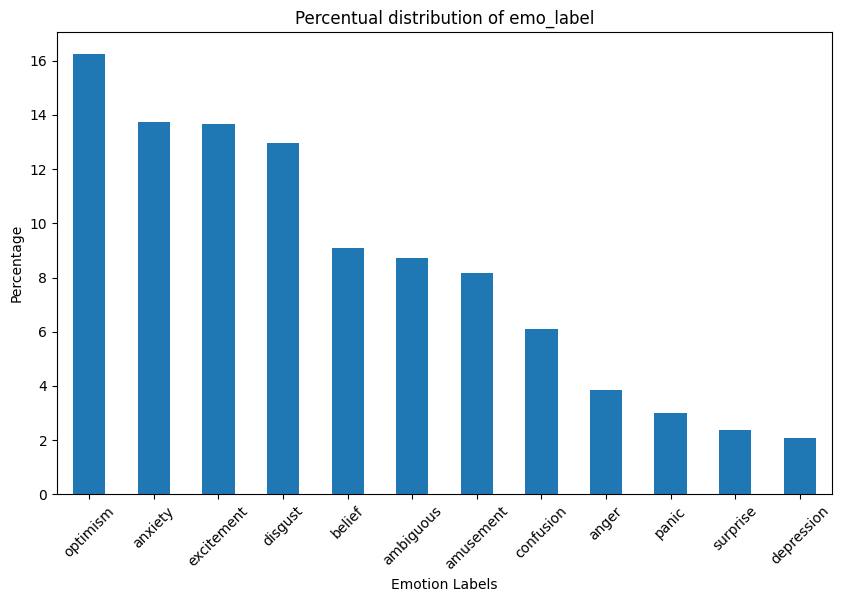

In [3]:
import matplotlib.pyplot as plt

emo_label_counts = data['emo_label'].value_counts()/len(data)*100

plt.figure(figsize=(10, 6))
emo_label_counts.plot(kind='bar')
plt.title('Percentual distribution of emo_label')
plt.xlabel('Emotion Labels')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()


In [4]:
emo_label_counts

emo_label
optimism      16.2375
anxiety       13.7375
excitement    13.6500
disgust       12.9625
belief         9.1000
ambiguous      8.7250
amusement      8.1500
confusion      6.1125
anger          3.8625
panic          3.0000
surprise       2.3875
depression     2.0750
Name: count, dtype: float64

In [5]:
print("Conteggio Bullish: ", len(data[data["senti_label"] == "Bullish"]))
print("Conteggio Bearish: ", len(data[data["senti_label"] == "Bearish"]))

Conteggio Bullish:  0
Conteggio Bearish:  0


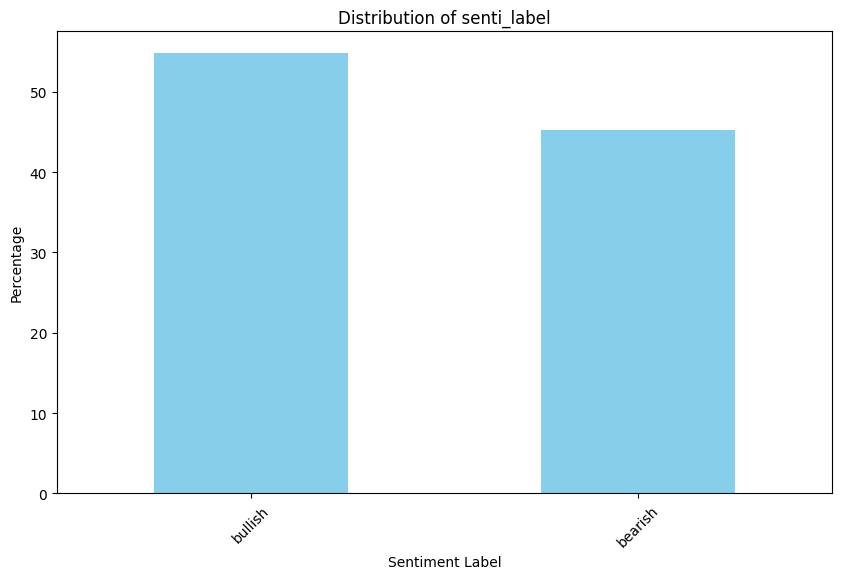

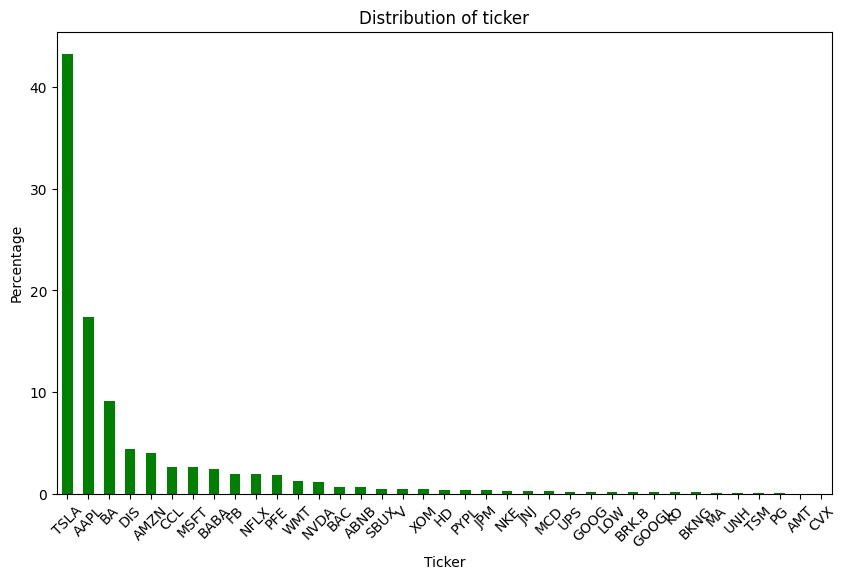

In [7]:
import matplotlib.pyplot as plt

senti_counts = data['senti_label'].value_counts()/len(data)*100
plt.figure(figsize=(10,6))
senti_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of senti_label')
plt.xlabel('Sentiment Label')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

ticker_counts = data['ticker'].value_counts()/len(data)*100
plt.figure(figsize=(10,6))
ticker_counts.plot(kind='bar', color='green')
plt.title('Distribution of ticker')
plt.xlabel('Ticker')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

### Tickers distribution

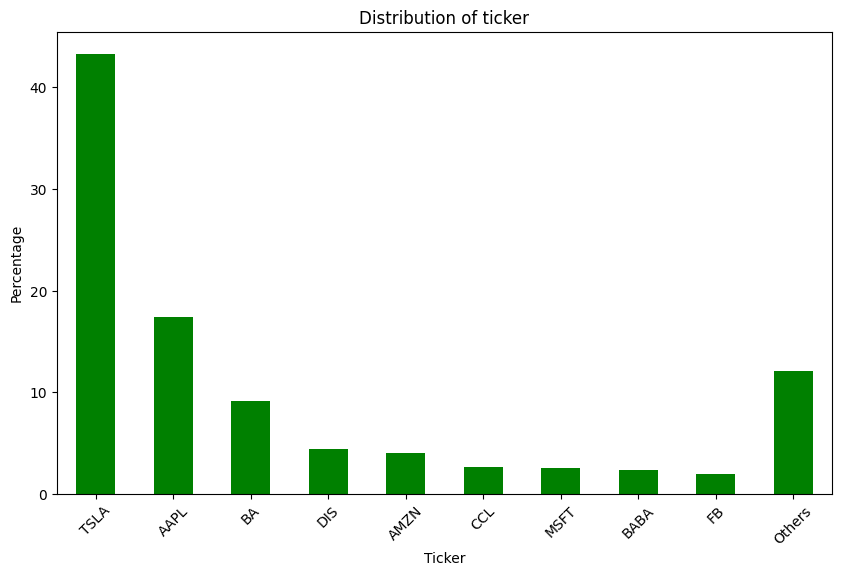

In [8]:
ticker_counts = data['ticker'].value_counts() / len(data) * 100
top_9_tickers = ticker_counts[:9]
others = pd.Series({'Others': ticker_counts[9:].sum()})

ticker_counts_grouped = pd.concat([top_9_tickers, others])

plt.figure(figsize=(10, 6))
ticker_counts_grouped.plot(kind='bar', color='green')
plt.title('Distribution of ticker')
plt.xlabel('Ticker')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()


In [9]:
ticker_counts_grouped

TSLA      43.2875
AAPL      17.4375
BA         9.1250
DIS        4.4375
AMZN       3.9875
CCL        2.6375
MSFT       2.6000
BABA       2.4000
FB         1.9750
Others    12.1125
dtype: float64

In [10]:
num_others = len(ticker_counts[9:])  
print(f"The number of 'other' tickers is: {num_others}")

The number of 'other' tickers is: 28


Temporal EDA

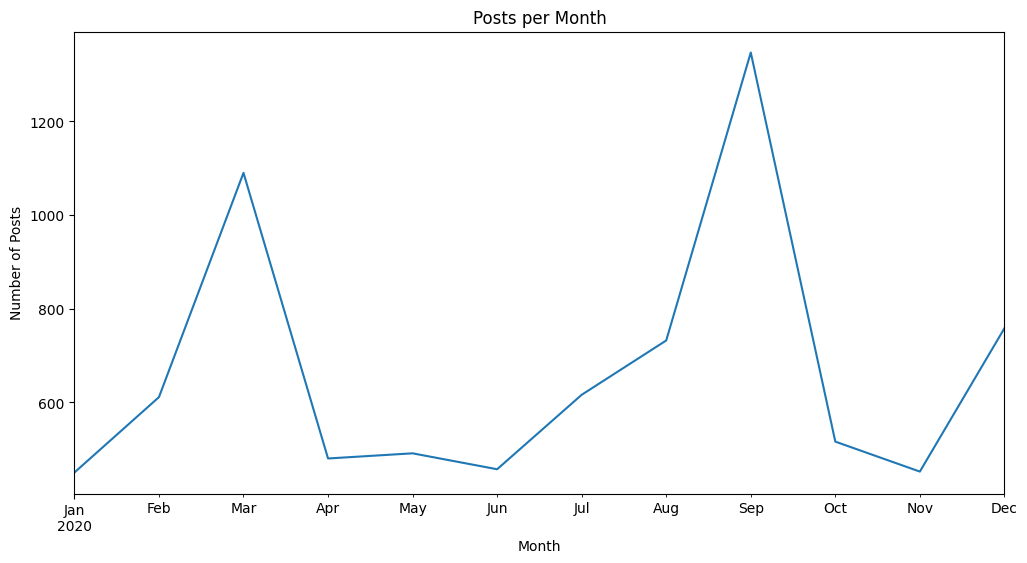

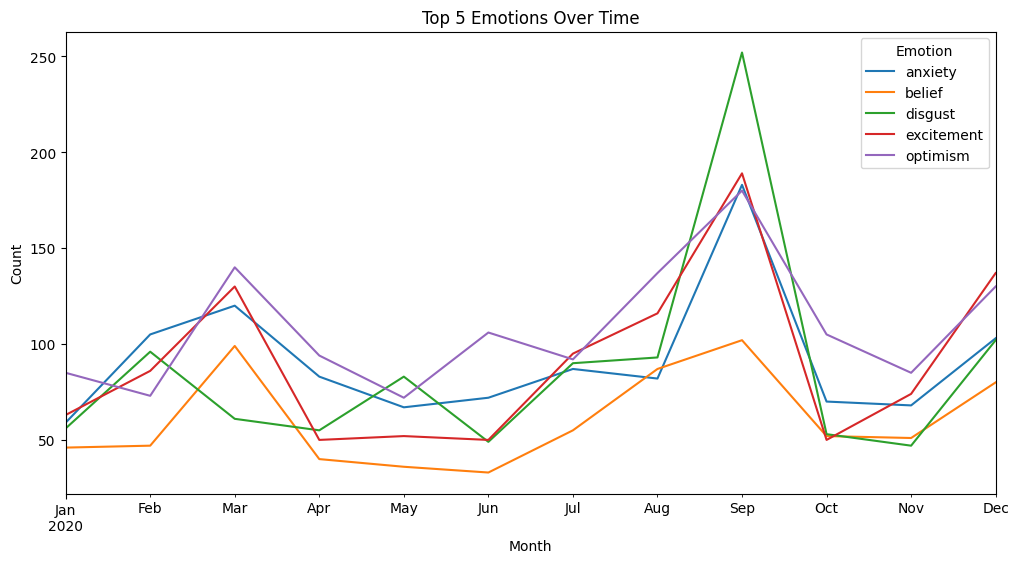

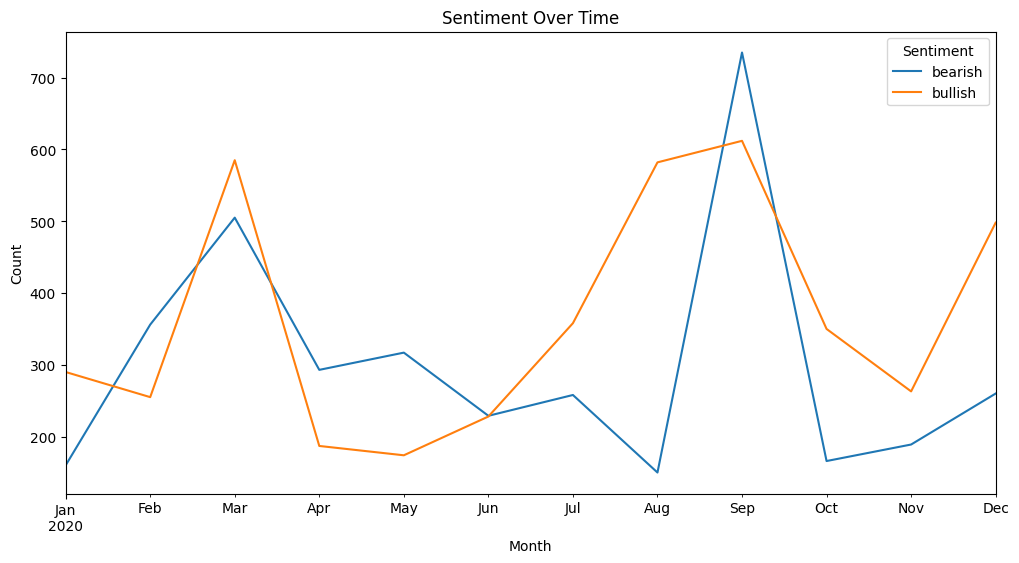

In [11]:
data['date'] = pd.to_datetime(data['date'])

posts_per_month = data.groupby(data['date'].dt.to_period('M')).size()
posts_per_month.plot(figsize=(12,6))
plt.title('Posts per Month')
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.show()

top_emotions = data['emo_label'].value_counts().nlargest(5).index
filtered = data[data['emo_label'].isin(top_emotions)]
emo_time = filtered.groupby([filtered['date'].dt.to_period('M'), 'emo_label']).size().unstack()
emo_time.plot(figsize=(12,6))
plt.title('Top 5 Emotions Over Time')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Emotion')
plt.show()

senti_time = data.groupby([data['date'].dt.to_period('M'), 'senti_label']).size().unstack()
senti_time.plot(figsize=(12,6))
plt.title('Sentiment Over Time')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

Cross-visualization of sentiment and emotion distributions

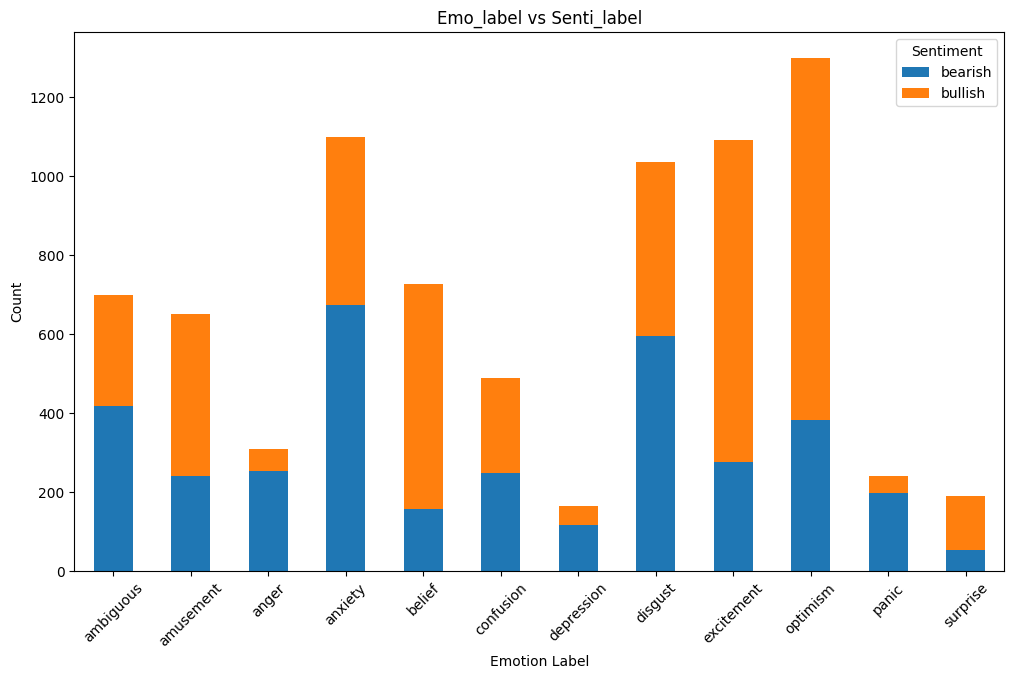

In [12]:
cross_tab = pd.crosstab(data['emo_label'], data['senti_label'])
cross_tab.plot(kind='bar', stacked=True, figsize=(12,7))
plt.title('Emo_label vs Senti_label')
plt.xlabel('Emotion Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

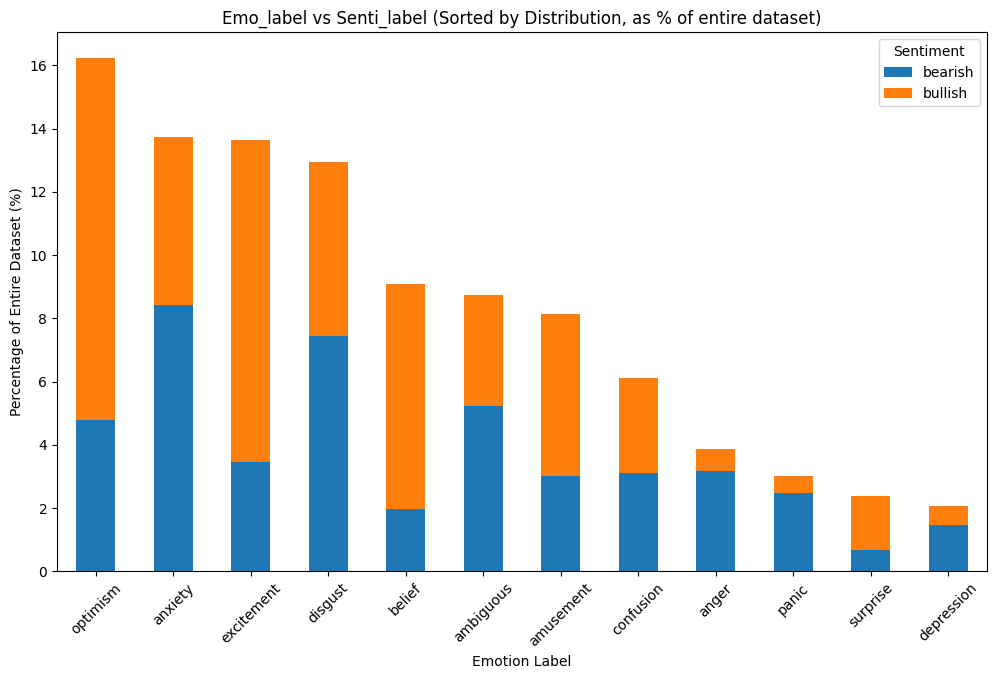

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

cross_tab = pd.crosstab(data['emo_label'], data['senti_label'])
cross_tab['Total'] = cross_tab.sum(axis=1)
cross_tab = cross_tab.sort_values(by='Total', ascending=False)
total_count = len(data)
cross_tab_pct = cross_tab.drop(columns='Total').div(total_count) * 100

cross_tab_pct.plot(kind='bar', stacked=True, figsize=(12,7))
plt.title('Emo_label vs Senti_label (Sorted by Distribution, as % of entire dataset)')
plt.xlabel('Emotion Label')
plt.ylabel('Percentage of Entire Dataset (%)')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

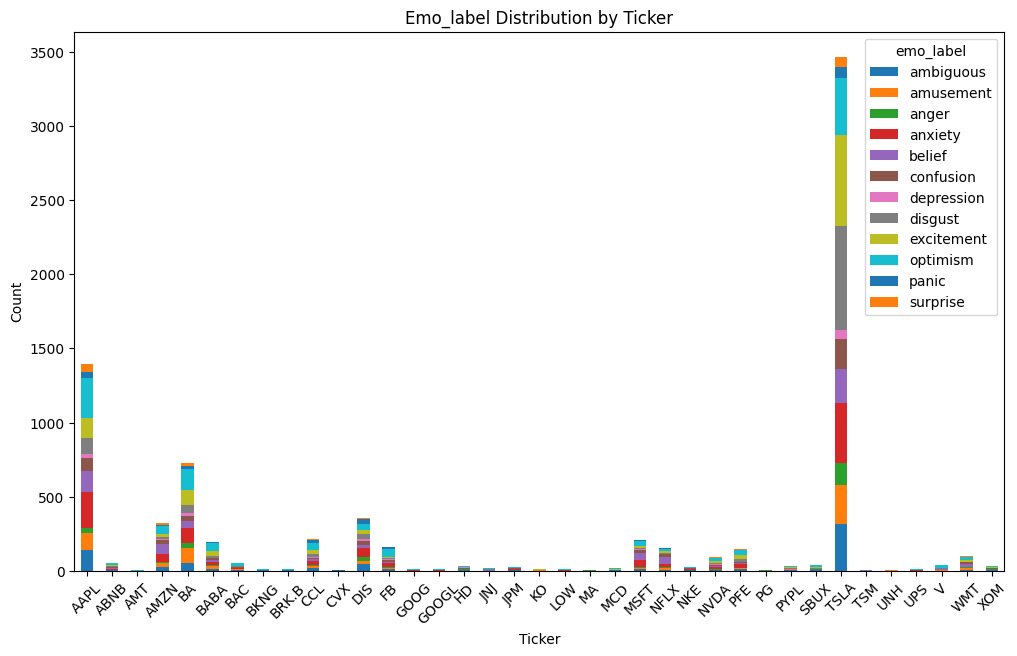

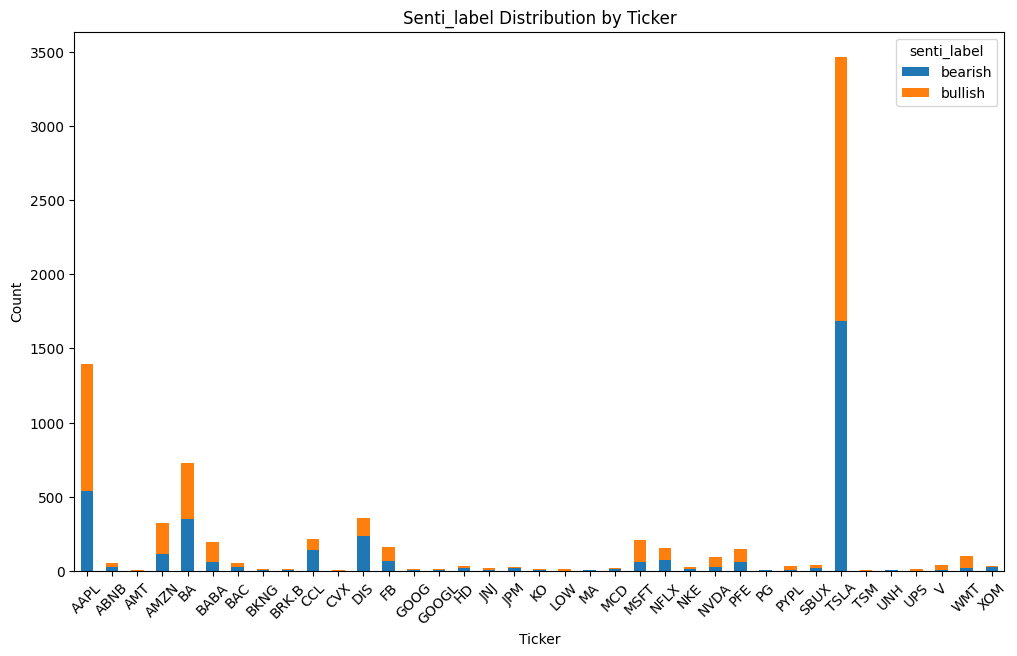

In [14]:
emo_by_ticker = pd.crosstab(data['ticker'], data['emo_label'])
emo_by_ticker.plot(kind='bar', stacked=True, figsize=(12,7))
plt.title('Emo_label Distribution by Ticker')
plt.xlabel('Ticker')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

senti_by_ticker = pd.crosstab(data['ticker'], data['senti_label'])
senti_by_ticker.plot(kind='bar', stacked=True, figsize=(12,7))
plt.title('Senti_label Distribution by Ticker')
plt.xlabel('Ticker')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Text length

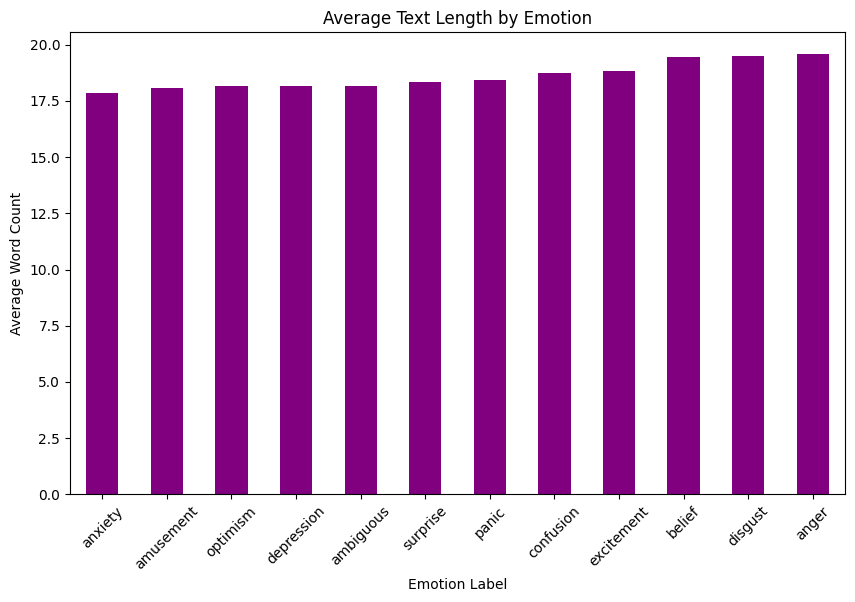

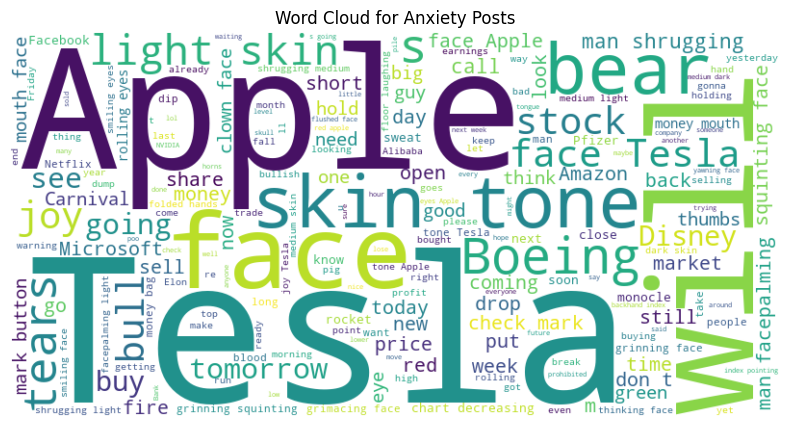

In [15]:
data['text_length'] = data['processed'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10,6))
data.groupby('emo_label')['text_length'].mean().sort_values().plot(kind='bar', color='purple')
plt.title('Average Text Length by Emotion')
plt.xlabel('Emotion Label')
plt.ylabel('Average Word Count')
plt.xticks(rotation=45)
plt.show()

from wordcloud import WordCloud

anxiety_text = ' '.join(data.loc[data['emo_label']=='anxiety', 'processed'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(anxiety_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Anxiety Posts')
plt.show()

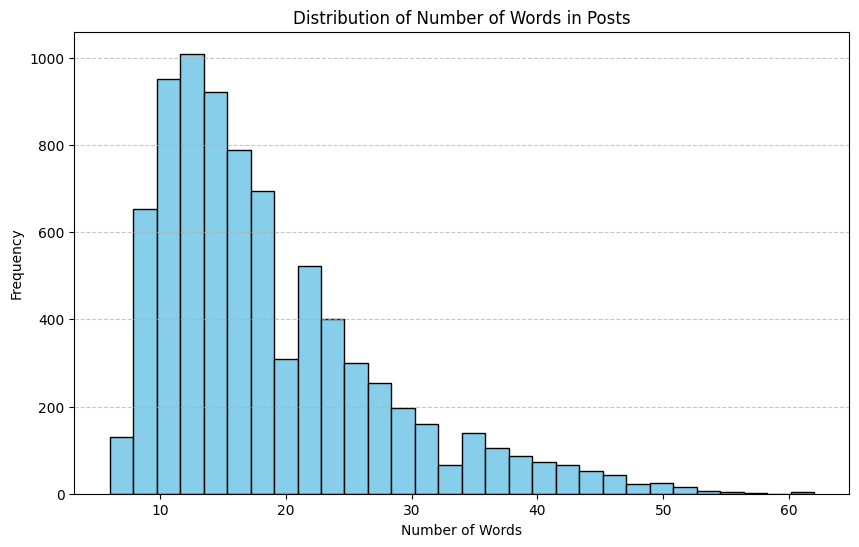

In [16]:
plt.figure(figsize=(10, 6))
data['text_length'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Words in Posts')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [17]:
data["text_length"].mean()

18.59575

In [18]:
data['text_length'] = data['processed'].apply(lambda x: len(str(x).split()))
data.groupby('emo_label')['text_length'].mean()

emo_label
ambiguous     18.177650
amusement     18.085890
anger         19.572816
anxiety       17.861692
belief        19.456044
confusion     18.760736
depression    18.156627
disgust       19.475410
excitement    18.819597
optimism      18.155504
panic         18.416667
surprise      18.350785
Name: text_length, dtype: float64

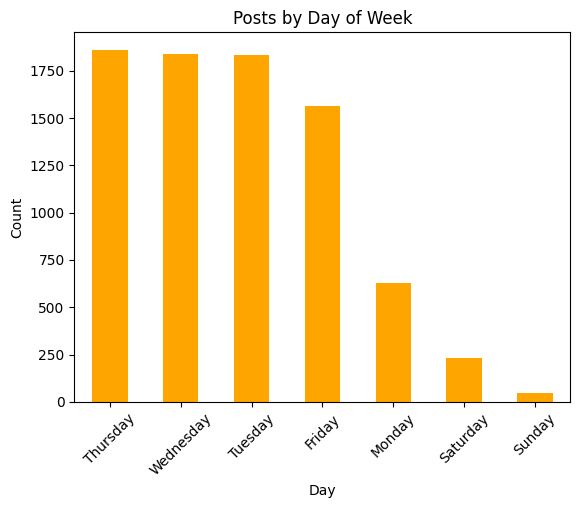

In [21]:
data['day_of_week'] = data['date'].dt.day_name()
day_counts = data['day_of_week'].value_counts()
day_counts.plot(kind='bar', color='orange')
plt.title('Posts by Day of Week')
plt.xlabel('Day')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()